# Capstone Project on Apple App Rating

## Problem Summary:
With million of apps around nowadays, mobile app analytics is a great way to understand the existing strategy to drive growth and retention of future user. This data set contains more than 7000 Apple iOS mobile application details, e.g. size, price, genre, rating_count, description and etc. The data was extracted from the iTunes Search API at the Apple Inc website. The goal is to predict whether the overall rating for the app is more than 4 stars (1=yes, 0=no), which we think it a very good app

## Exploratory Data Analysis
* Build data profile tables and plots
* Outliers & Anomalies
* Explore data relationships
* Identification and creation of features

Load packages needed for EDA

In [2]:
#load python packages
import os
import pandas as pd
import datetime 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline

currentdirectory = os.getcwd()
print(currentdirectory)


/Users/oluwafemibabatunde


In [3]:
path = '/Users/oluwafemibabatunde/Desktop/Springboard/capstone_one/apple-app/data'

In [4]:
os.chdir(path) #Change current directory

In [5]:
df = pd.read_csv('step1_output.csv', index_col = 0) #load csv file from folder

In [6]:
df.head(3) #load top 3 rows of dataframe

,id,size_bytes,price,rating_count_tot,rating_count_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,rating,Vector_track_name,Vector_desc
0,1169417102,196380672,4.99,1,1,1.02,4+,Games,38,5,1,1,0,[0. 0. 0. ... 0. 0. 0.],[0. 0. 0. ... 0. 0. 0.]
1,965748314,38805504,0.00,199,199,1.0.0,9+,Games,43,3,16,0,0,[0. 0. 0. ... 0. 0. 0.],[0. 0. 0. ... 0. 0. 0.]
2,307764057,25808896,0.00,182,0,6.52,17+,Entertainment,37,5,3,1,0,[0. 0. 0. ... 0. 0. 0.],[0. 0. 0. ... 0. 0. 0.]


In [7]:
df.shape #shape of the dataframe

(5197, 15)

In [8]:
df.dtypes

id                     int64
size_bytes             int64
price                float64
rating_count_tot       int64
rating_count_ver       int64
ver                   object
cont_rating           object
prime_genre           object
sup_devices.num        int64
ipadSc_urls.num        int64
lang.num               int64
vpp_lic                int64
rating                 int64
Vector_track_name     object
Vector_desc           object
dtype: object

In [9]:
df.cont_rating.unique()

array(['4+', '9+', '17+', '12+'], dtype=object)

In [10]:
nosymb = df['cont_rating'].str.replace('+', '')

In [11]:
df['cont_rating'] = pd.to_numeric(nosymb)

In [12]:
df.describe().T #this give the summary statistics of variables in data fram that is type float or int.

,count,mean,std,min,25%,50%,75%,max
id,5197.0,8.645881e+08,2.713919e+08,281656475.0,599852923.0,981819100.0,1.082678e+09,1.187839e+09
size_bytes,5197.0,1.970589e+08,3.417424e+08,618496.0,47585280.0,98246656.0,1.853706e+08,4.025970e+09
price,5197.0,1.741312e+00,6.534191e+00,0.0,0.0,0.0,1.990000e+00,2.999900e+02
rating_count_tot,5197.0,1.288472e+04,7.080212e+04,0.0,27.0,307.0,2.908000e+03,2.161558e+06
rating_count_ver,5197.0,4.636350e+02,4.039022e+03,0.0,1.0,24.0,1.450000e+02,1.770500e+05
cont_rating,5197.0,7.055994e+00,4.302163e+00,4.0,4.0,4.0,9.000000e+00,1.700000e+01
sup_devices.num,5197.0,3.742236e+01,3.626466e+00,9.0,37.0,37.0,3.800000e+01,4.700000e+01
ipadSc_urls.num,5197.0,3.719454e+00,1.981193e+00,0.0,3.0,5.0,5.000000e+00,5.000000e+00
lang.num,5197.0,5.405426e+00,7.901467e+00,0.0,1.0,1.0,8.000000e+00,7.500000e+01
vpp_lic,5197.0,9.932653e-01,8.179600e-02,0.0,1.0,1.0,1.000000e+00,1.000000e+00


In [13]:
corr = df.corr() #find possible correlation between variables in datafram
corr.round(2).style.background_gradient(cmap='coolwarm')

,id,size_bytes,price,rating_count_tot,rating_count_ver,cont_rating,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,rating
id,1,0.08,-0.07,-0.21,-0.08,0.02,0.03,0.07,-0.13,0.01,-0.04
size_bytes,0.08,1,0.15,0,0.01,0.14,-0.12,0.17,0.01,-0.16,0.02
price,-0.07,0.15,1,-0.04,-0.02,-0.03,-0.11,0.06,-0.01,-0.02,0
rating_count_tot,-0.21,0,-0.04,1,0.17,0.02,0,0.02,0.12,0,0.11
rating_count_ver,-0.08,0.01,-0.02,0.17,1,0,0.03,0.02,0.02,0.01,0.08
cont_rating,0.02,0.14,-0.03,0.02,0,1,0.02,-0.11,-0.05,-0.05,-0.02
sup_devices.num,0.03,-0.12,-0.11,0,0.03,0.02,1,-0.04,-0.05,-0.04,0.04
ipadSc_urls.num,0.07,0.17,0.06,0.02,0.02,-0.11,-0.04,1,0.1,0.07,0.17
lang.num,-0.13,0.01,-0.01,0.12,0.02,-0.05,-0.05,0.1,1,0.03,0.11
vpp_lic,0.01,-0.16,-0.02,0,0.01,-0.05,-0.04,0.07,0.03,1,0.04


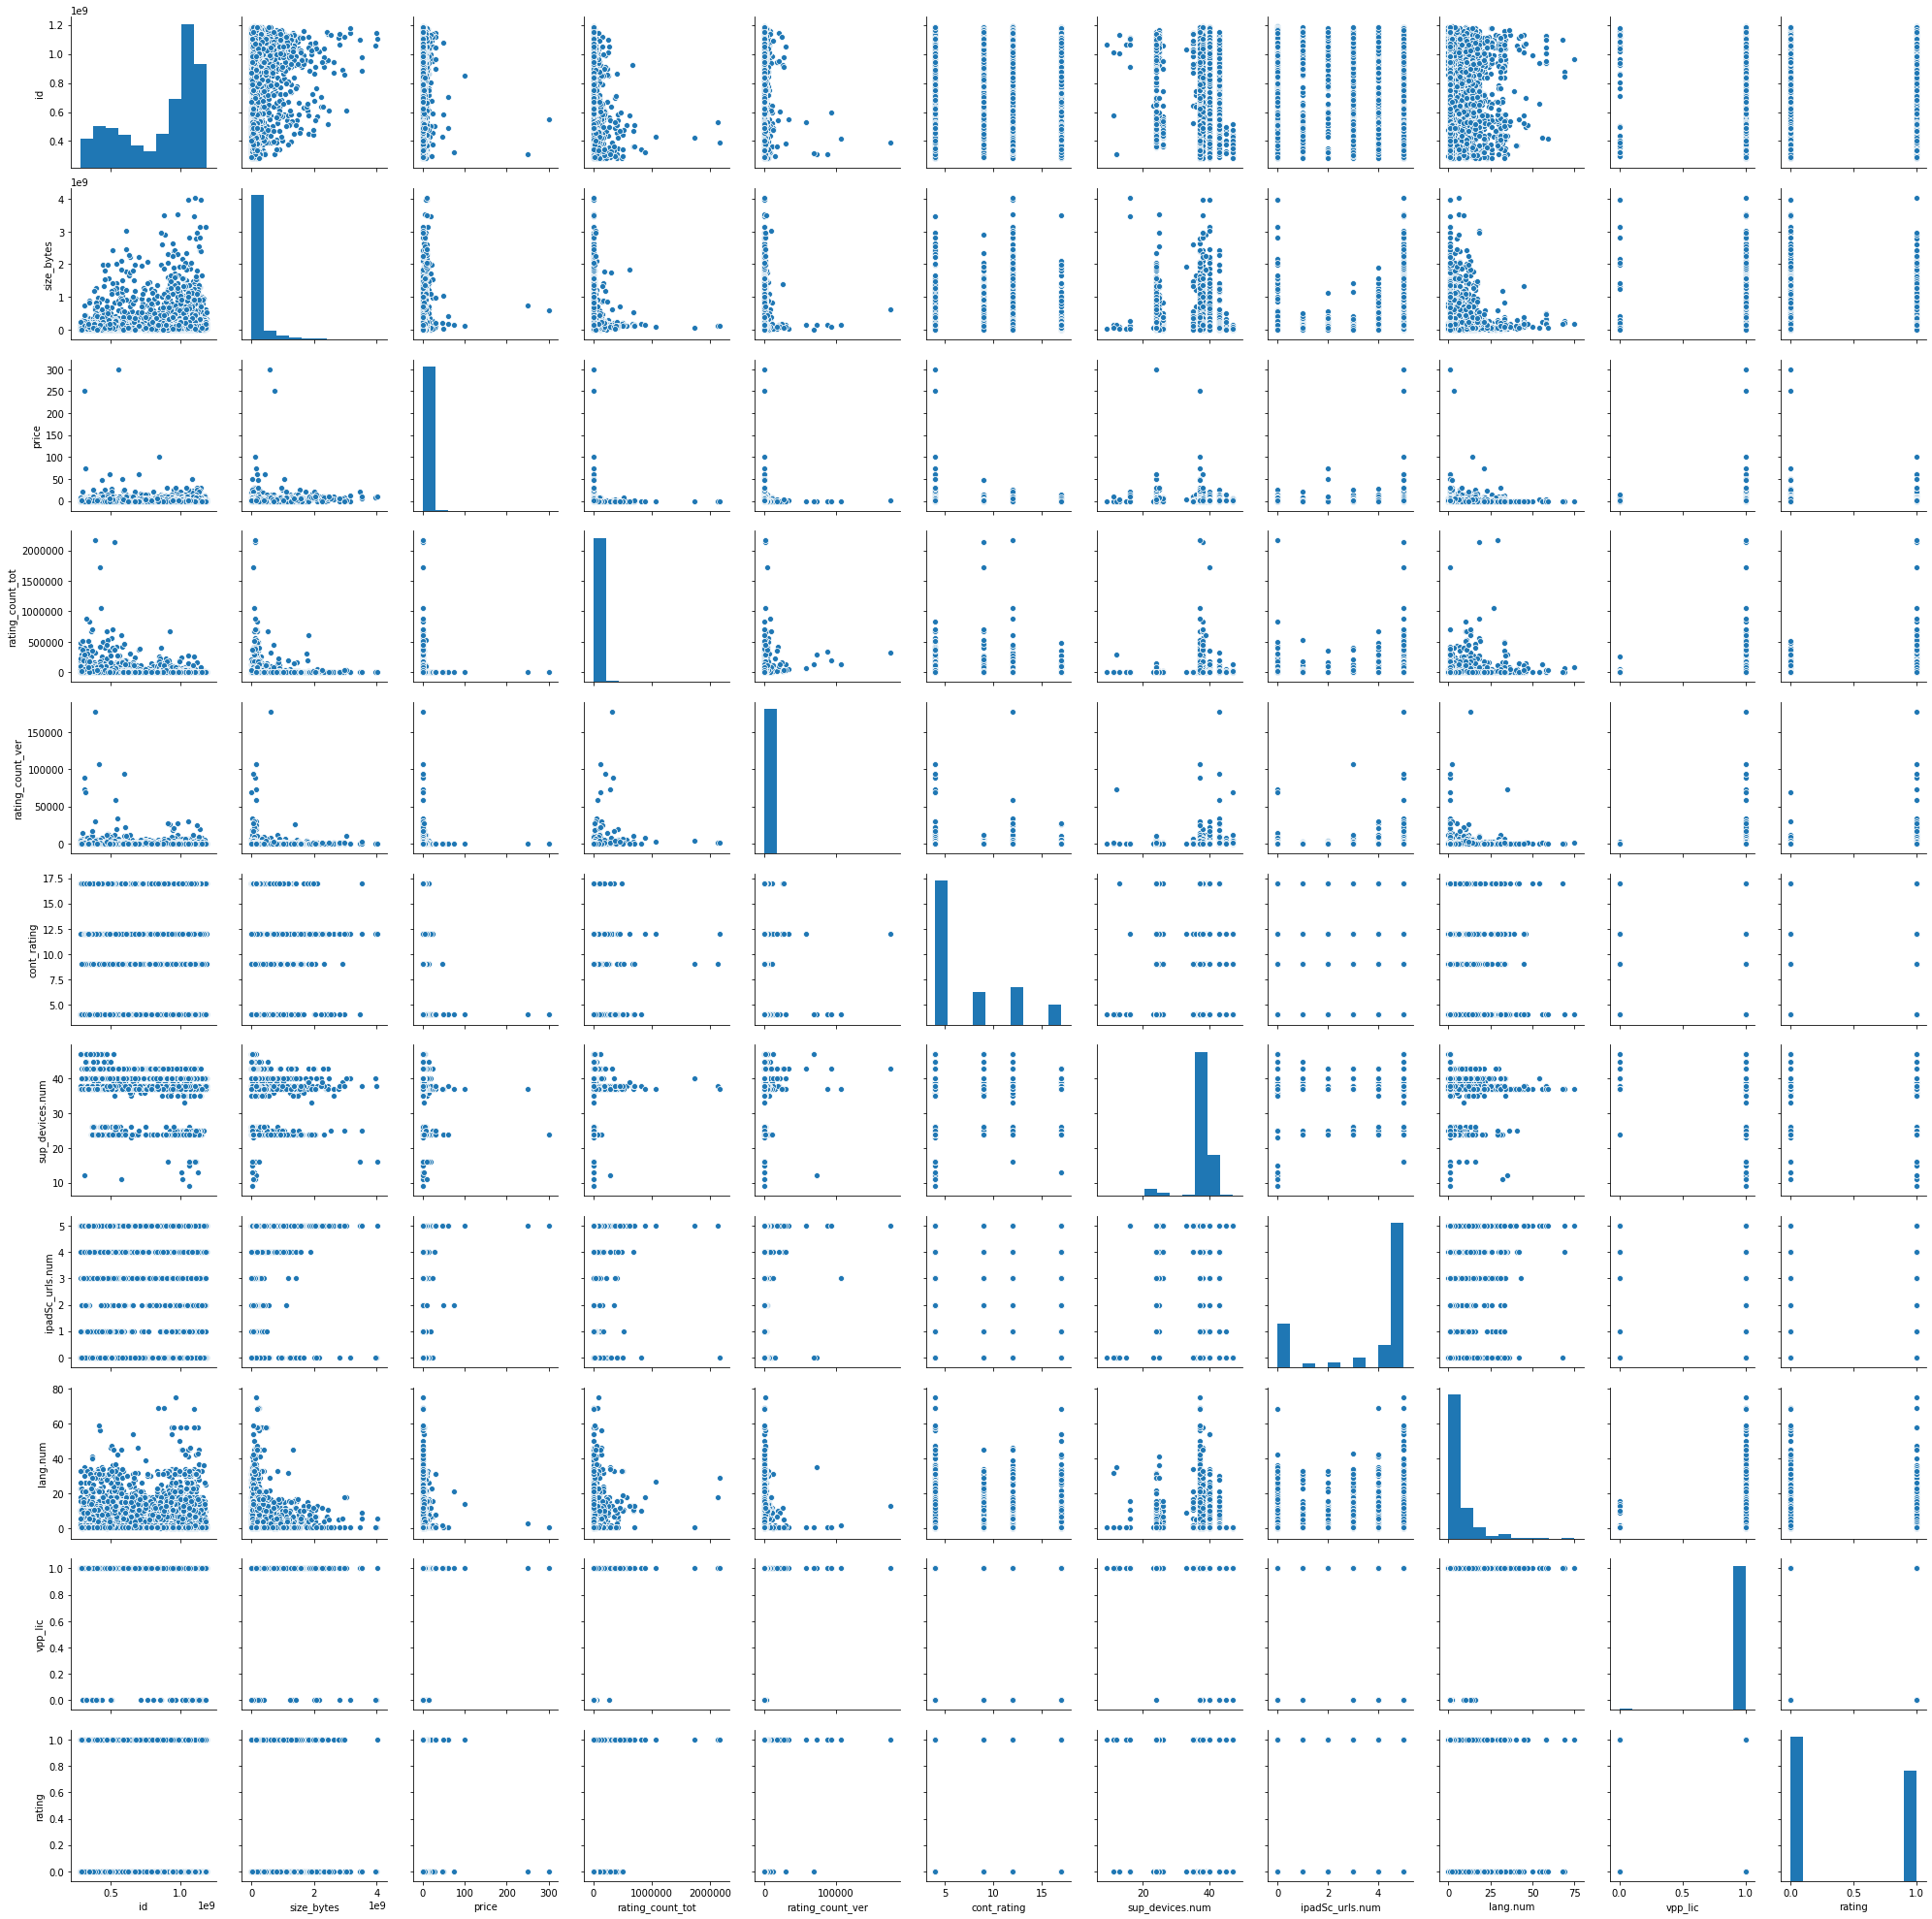

In [14]:
sns.pairplot(df)

In [15]:
df.price.describe()

count    5197.000000
mean        1.741312
std         6.534191
min         0.000000
25%         0.000000
50%         0.000000
75%         1.990000
max       299.990000
Name: price, dtype: float64

In [16]:
df.prime_genre.unique()

array(['Games', 'Entertainment', 'Finance', 'Education',
       'Health & Fitness', 'Navigation', 'Photo & Video', 'Business',
       'Travel', 'Shopping', 'Lifestyle', 'Food & Drink', 'Music', 'News',
       'Social Networking', 'Productivity', 'Medical', 'Reference',
       'Utilities', 'Weather', 'Sports', 'Book', 'Catalogs'], dtype=object)

In [ ]:
plt.figure(figsize=(40,20))
sns.swarmplot(x= 'prime_genre', y = 'price', data = df, size = 6)

In [ ]:
plt.figure(figsize=(40,20))
heatmap = sns.heatmap(df.corr(), annot = True)
plt.title('Heat Map')
plt.savefig('/Users/oluwafemibabatunde/Desktop/Springboard/capstone_one/apple-app/figures/heat_map.png', bbox_inches = 'tight')

In [ ]:
df.columns

In [ ]:
column = ['size_bytes', 'price', 'rating_count_tot', 'rating_count_ver',
        'cont_rating', 'sup_devices.num',
       'ipadSc_urls.num', 'lang.num', 'vpp_lic', 'rating']

In [ ]:
plt.figure(figsize=(20,10))
df.boxplot(column = column)

In [ ]:
plt.figure(figsize = (30, 10))
games_genre = sns.countplot(data = df, x = 'prime_genre')
plt.title('Prime Genre')
plt.savefig('/Users/oluwafemibabatunde/Desktop/Springboard/capstone_one/apple-app/figures/games_genre.png', bbox_inches = 'tight')

In [ ]:
plt.figure(figsize=(40,10))
sns.boxplot(x= 'prime_genre', y = 'sup_devices.num', data = df)

In [ ]:
df = df.drop(columns = 'ver')

In [ ]:
plt.figure(figsize=(30,10))
plt.hist(df.rating);

In [ ]:
dfG = df.groupby('prime_genre')['rating'].agg(['mean', 'count']).sort_values(by='mean')

In [ ]:
plt.boxplot()

Based on the dataframe above, good number of the genres have ratings equal or lower to 4 stars. 

In [ ]:
df.boxplot(column='rating', by='prime_genre', figsize = (40,15))

In [ ]:
df_price = df.groupby('rating')['price'].describe()
df_price.head(10)

In [ ]:
df.boxplot(column='price', by='rating', figsize = (40,15))

In [ ]:
sns.catplot(x='rating', y='price', kind='bar', data=df)

In [ ]:
df[]

In [ ]:
df.to_csv(r'/Users/oluwafemibabatunde/Desktop/Springboard/capstone_one/apple-app/data/step2_output.csv')